In [1]:
import torch
from pytorch_lightning import seed_everything
from dataset.unet.UnetDataModule import UnetDataModule
from model.unet.UnetModel import UnetModel
from utils.PlottingUtils import plot_unet_batch
import pytorch_lightning as pl

%load_ext autoreload
%autoreload 2

### Ensure reproducability

In [2]:
RANDOM_SEED = 47
torch.backends.cudnn.deterministic = True
seed_everything(RANDOM_SEED)

47

In [3]:
unetDataModule = UnetDataModule(batch_size=4)
unetDataModule.prepare_data()
unetDataModule.setup()

Complete sample size: 254 
Training samples: 203 
Validation samples: 25 
Test samples: 26


In [4]:
train_data = unetDataModule.train_dataloader()
val_data = unetDataModule.val_dataloader()

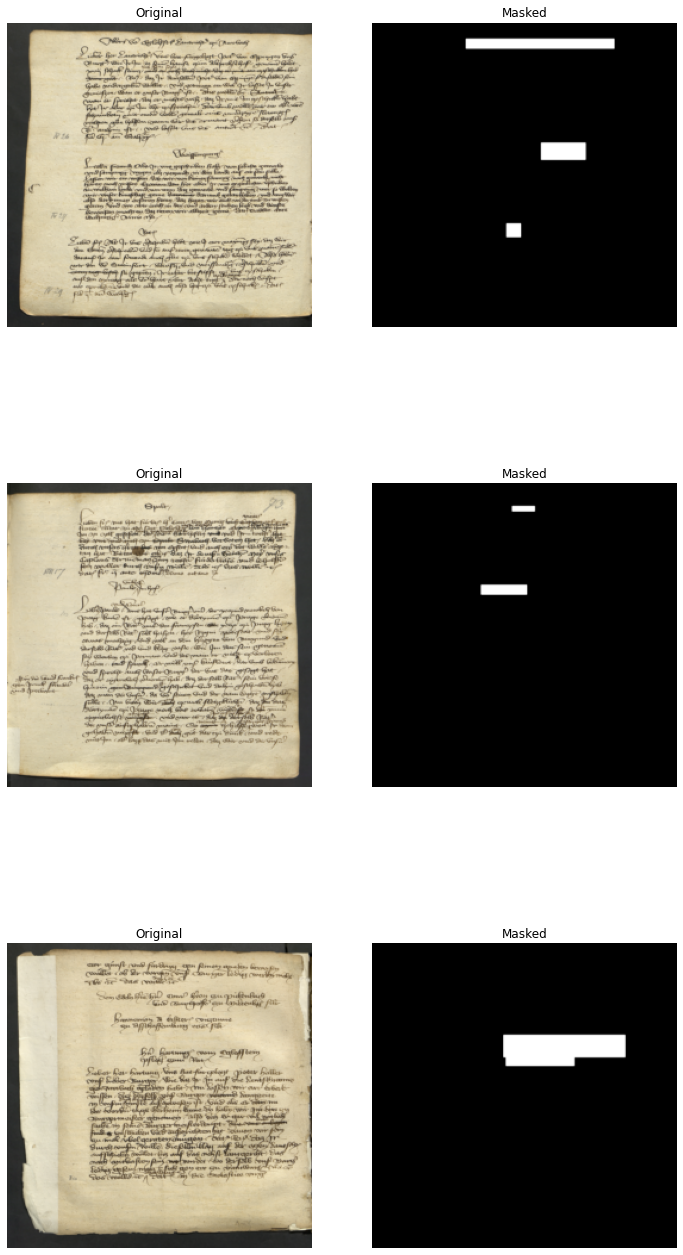

In [6]:
plot_unet_batch(train_data)

In [18]:
model = UnetModel()
trainer = pl.Trainer(gpus=1, auto_lr_find=True, max_epochs=5, fast_dev_run=True)
#trainer.tune(model, train_dataloader=train_data)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Running in fast_dev_run mode: will run a full train, val and test loop using a single batch


In [19]:
trainer.fit(model, train_data, val_data)


  | Name    | Type              | Params
----------------------------------------------
0 | unet    | Unet              | 34 M  
1 | softmax | LogSoftmax        | 0     
2 | loss    | BCEWithLogitsLoss | 0     


Training: 0it [00:00, ?it/s]

C:\Git\Uni\nbb-recipient-detection\model\unet\UnetModel.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return softmax_output
C:\tools\miniconda3\envs\nbb-rd\lib\site-packages\pytorch_lightning\utilities\distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

In [17]:
trainer.save_checkpoint("unet.ckpt")